### Decision Trees


In [4]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# importing data
df=pd.read_csv("data/train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Id,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotFrontage,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,60,0,0,1,0,0,65,...,0,0,0,1,0,0,0,0,1,0
1,1,1,2,20,0,0,1,0,0,80,...,0,0,0,1,0,0,0,0,1,0
2,2,2,3,60,0,0,1,0,0,68,...,0,0,0,1,0,0,0,0,1,0
3,3,3,4,70,0,0,1,0,0,60,...,0,0,0,1,1,0,0,0,0,0
4,4,4,5,60,0,0,1,0,0,84,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

# Top 20 features correlated with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)[1:21]

# Plot top correlated features
plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='viridis')
plt.title('Top 20 Features Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.show()

# Heatmap of top correlated features
top_features = top_corr_features.index.tolist() + ['SalePrice']
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features')
plt.show()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_20216\4126233663.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


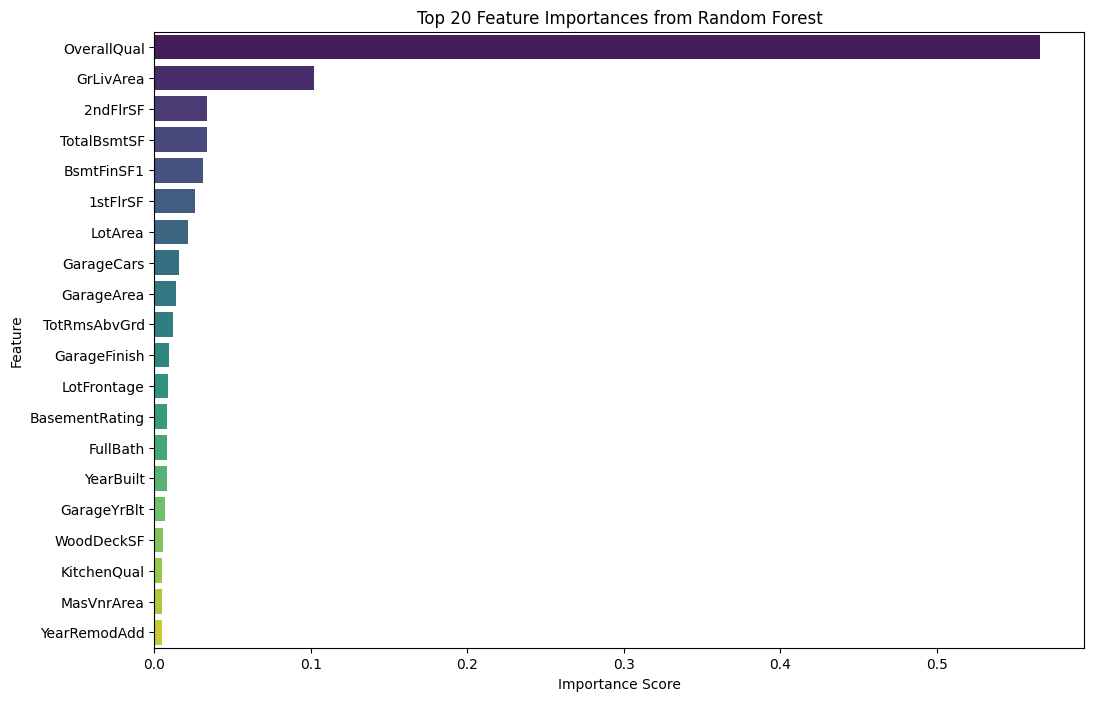

In [8]:
# Prepare data for feature importance
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

# One-hot encode categorical variables (if any non-binary categoricals exist)
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 
                                  'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', 
            data=feature_importances.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Mean Absolute Error: $23,243.57
MAE represents 12.87% of the average home price


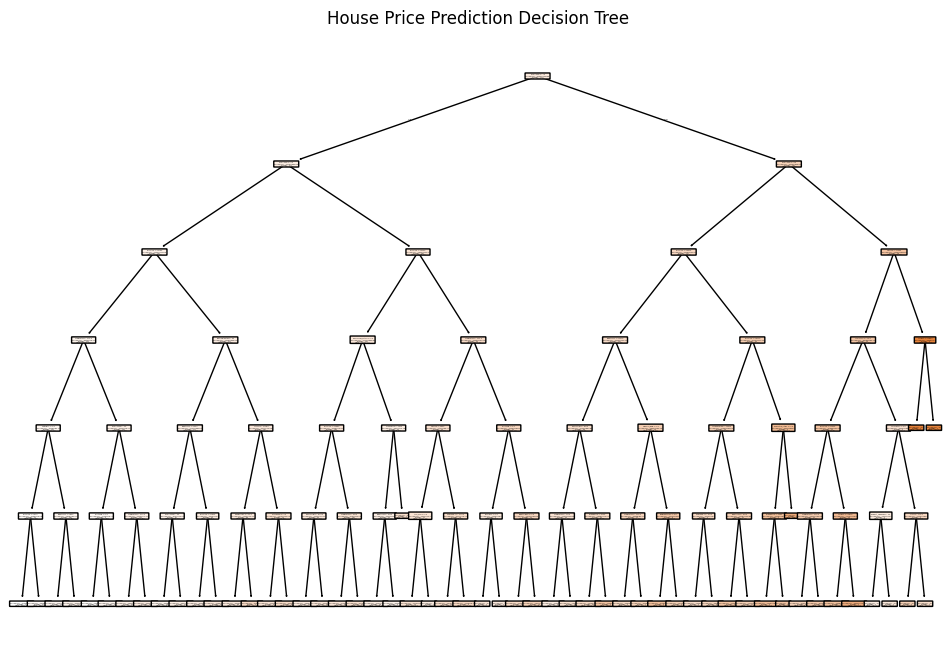

In [13]:
# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}")

avg_price = df['SalePrice'].mean()
error_percentage = (23243.57 / avg_price) * 100
print(f"MAE represents {error_percentage:.2f}% of the average home price")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("House Price Prediction Decision Tree")
plt.show()

In [16]:
import joblib

joblib.dump(tree_model, 'DecisionTrees.joblib')

['DecisionTrees.joblib']

### Random Forest